# Curating african US fetal datasets

**Author(s):** Miguel Xochicale [@mxochicale](https://github.com/mxochicale)   
**Contributor(s):**    
**Google-colabs:** 


## Introduction
This notebook presents curation of African US datasets

### Running notebook

Go to repository path: `cd $HOME/repositories/mxochicale/medisynth/`   
Open repo in pycharm and in the terminal type:
```
git checkout master # or the branch
git pull # to bring a local branch up-to-date with its remote version
```
Launch Notebook server:
```
export PYTHONPATH="${PYTHONPATH}:$HOME/repositories/mxochicale/medisynth"
mamba activate *VE
jupyter notebook --browser=firefox
```
which will open your web-browser.


### Logbook
* 15-Jul-2023: adds notebook 
* Sat 15 Jul 04:21:22 BST 2023: Added `AfricanFetalPlaneDataset` and tested in notebook

### References
* Maternal fetal ultrasound planes from low-resource imaging settings in five African countries (456 items, totalling 55.7 MB) > https://zenodo.org/record/7540448




# Jupyter Notebook

## Installing package dependencies (for google-colabs)

In [1]:
!pip install medisynth

## Setting imports and datasets paths

In [2]:
from medisynth import AfricanFetalPlaneDataset

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision.utils as vutils
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]

REPOSITORY_PATH='repositories/datasets/african-fetal-us-dataset/'
FULL_REPO_DATA_PATH = HOME_PATH+'/'+REPOSITORY_PATH

# Root directory for dataset
dataroot = FULL_REPO_DATA_PATH + "Images/"
ref = FULL_REPO_DATA_PATH + "African_planes_database.csv"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Printing Versions and paths
print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}' )
print(f'Device: {device}')

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)


FULL_REPO_DATA_PATH: /home/mxochicale/repositories/datasets/african-fetal-us-dataset/
Device: cuda:0
Random Seed:  999


## Setting variables for dataloader

<class 'medisynth.medisynth.AfricanFetalPlaneDataset'>
lenght 25
<class 'list'>
2
torch.Size([25, 1, 100, 100])
torch.Size([25, 1, 400, 400])
torch.Size([3, 2012, 2012])


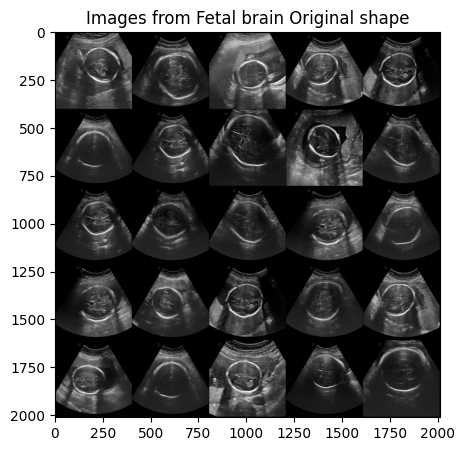

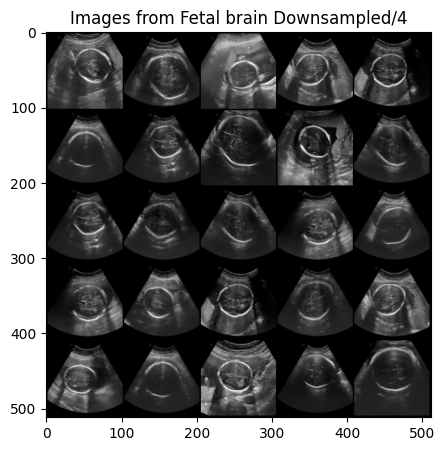

In [3]:
## Select contry for any plan
# country='Algeria'; plane = None  #lenght 100
# country='Egypt'; plane = None  #lenght 100
# country='Malawi'; plane = None  #lenght 100
# country='Uganda'; plane = None  #lenght 75
# country='Ghana'; plane = None  #lenght 75

##Select country for fetal brain plains 
country='Algeria'; plane = 'Fetal brain' #lenght 25
# country='Egypt'; plane = 'Fetal brain' #lenght  25
# country='Malawi'; plane = 'Fetal brain' #lenght 25
# country='Uganda'; plane = 'Fetal brain'  #lenght 25
# country='Ghana'; plane = 'Fetal brain'  #lenght 25

# plane = 'Fetal abdomen'; country='Algeria' #lenght 25
# plane = 'Fetal femur'; country='Algeria' #lenght 25
# plane = 'Fetal brain'; country='Egypt' #lenght  25
# plane = 'Fetal brain'; country='Malawi' #lenght 25
# plane = 'Fetal brain'; country='Uganda' #lenght 25
# plane = 'Fetal brain'; country='Ghana' #lenght 25

## Select all 
# plane = None; country=None #lenght based on train size

##Select Fetal Plane
# plane = 'Fetal brain'
# plane = 'Fetal abdomen'
# plane = 'Fetal femur'
# plane = 'Fetal thorax'
# plane = None

##Select African country
# country='Algeria'
# country='Egypt'
# country='Malawi'
# country='Uganda'
# country='Ghana'
# country=None

## Patient number
# patient Algeria = 1, 4, 7, 12, 14, 16, 18, 23, 24, 27, 30, 31, 33, 34, 35, 36, 38, 41, 44, 45, 48, 51, 52, 53
# Train=0
# Train=1


## Image size
# image_size = 28
# image_size = 64
# image_size = 100
# image_size = 250
image_size = 400
# image_size = 512

## Number of workers for dataloader
workers = 8

## Batch size during training
# batch_size = 2
# batch_size = 3
# batch_size = 4
# batch_size = 8
# batch_size = 16
batch_size = 32
# batch_size = 128

image_channels = 1

SHUFFLE_T = True
SHUFFLE_F = False

downsampling_factor = 4

number_of_train_sample_size = 400
train_label_F=False
train_label_T=True


transform_operations=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Grayscale(num_output_channels=image_channels),
                        #mt.RandRotate(range_x=0.1, prob=0.5),
                        #mt.RandZoom(prob=0.5, min_zoom=1, max_zoom=1.1),
                        #mt.Resize([image_size, image_size]),
                        transforms.Resize([image_size, image_size], antialias=True),
                        transforms.Normalize((0.5), (0.5)), #mean=0.5, std=0.5
                        ])

dataset = AfricanFetalPlaneDataset(root_dir=dataroot,
                            csv_file=ref,
                            plane=plane,
                            country=country,
                            transform=transform_operations,
                            train=train_label_T,
                            train_size=number_of_train_sample_size,
                            downsampling_factor=downsampling_factor
                           )

print(type(dataset))#<class 'medisynth.medisynth.AfricanFetalPlaneDataset'>

number_of_images = dataset.__len__()
print(f'lenght {number_of_images}')

dataloader = DataLoader(dataset, 
                        batch_size=batch_size,
                        shuffle=SHUFFLE_T, 
                        num_workers=workers)

## Plot some training images
real_batch = next(iter(dataloader))
print(type(real_batch)) #<class 'list'>
print(len(real_batch)) #<class 'list'>
image = real_batch[0]
ds_image = real_batch[1]

print(ds_image.shape)
print(image.shape)


grid_images=vutils.make_grid(image.to(device), nrow=5, padding=2, normalize=True)
print(grid_images.shape)
plt.figure(figsize=(15,5))
plt.title(f'Images from {plane} Original shape')
plt.imshow(grid_images.permute(1, 2, 0).cpu().numpy()  ) 
plt.show()


grid_ds_images=vutils.make_grid(ds_image.to(device), nrow=5, padding=2, normalize=True)
plt.figure(figsize=(15,5))
plt.title(f'Images from {plane} Downsampled/{downsampling_factor}')
plt.imshow(grid_ds_images.permute(1, 2, 0).cpu().numpy() )
plt.show()


batch_idx: 0;               sampled images in the batch: 0 of 25
    image.shape: torch.Size([25, 1, 400, 400])
    image.dtype: torch.float32
    ds_image.shape: torch.Size([25, 1, 100, 100])
    ds_image.dtype: torch.float32
    grid_img.shape: torch.Size([3, 2800, 1600])
    ds_grid_img.shape: torch.Size([3, 700, 400])


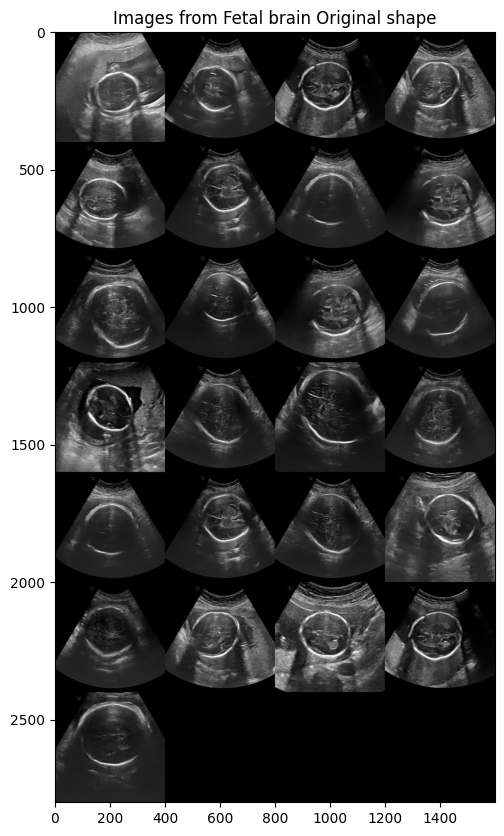

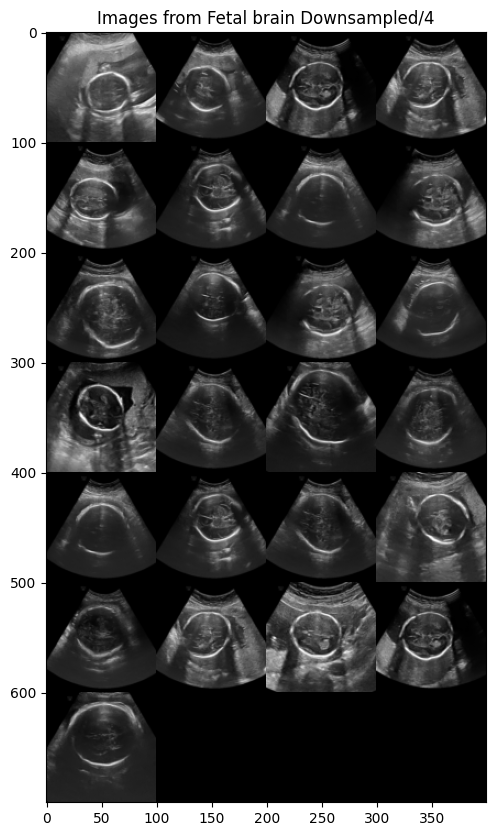

In [4]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, real_batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 20 == 0:
        print(f'batch_idx: {batch_idx}; \
              sampled images in the batch: { batch_idx*batch_size } of {number_of_images}')
        
        image = real_batch[0]
        ds_image = real_batch[1]
        
                
            
        print(f'    image.shape: {image.shape}') #torch.Size([BATCH_SIZE, 1, ORIGINAL, ORIGINAL])
        print(f'    image.dtype: {image.dtype}') #ds_image.dtype: torch.float32
        
        
        print(f'    ds_image.shape: {ds_image.shape}') #torch.Size([BATCH_SIZE, 1, ORIGINAL/2, ORIGINAL/2])
        print(f'    ds_image.dtype: {ds_image.dtype}') #ds_image.dtype: torch.float32

        
        grid_img = vutils.make_grid(image, nrow=4, padding=0, normalize=True)
        print(f'    grid_img.shape: {grid_img.shape}')# torch.Size([3, 512, 2048])
        
        
        ds_grid_img = vutils.make_grid(ds_image, nrow=4, padding=0, normalize=True)
        print(f'    ds_grid_img.shape: {ds_grid_img.shape}')# torch.Size([3, 512, 2048])
        
        
        
        plt.figure(figsize=(10,10))
        plt.title(f'Images from {plane} Original shape')
        #plt.axis("off")
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy()  ) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32")) 
        plt.show()
        
        plt.figure(figsize=(10,10))
        plt.title(f'Images from {plane} Downsampled/{downsampling_factor}')
        plt.imshow(ds_grid_img.permute(1, 2, 0).cpu().numpy()  ) 
        plt.show()
        